##  Momentum Indicators
### 5M Gain, 12M Gain and FundX Score Indicators
Robert Sloan <br>
5/22/2019 <br>
Replicating Al's AAII CIMI Market Review - Technical & Economic Indicators<br>

For 5M gain Compare 5 month gain of SPY vs. BIL<br>
For 12M gain Compare 12 month gain of SPY vs. BIL <br>
For FundX Score Compare FundX Score of SPY vs BIL <br>
Where FundX Score = average of (1 month + 3M + 5M + 12M gains)
If SPY<BIL go to cash<br>
<br>
TODO <br>
> Find out why some areas of the graph are not boxed in green (SPY better) or red (BIL better)
> Choose timeframe for data capture (start_date).   Use date relative to start_date to truncate spy_data and bil_data.
> Calculate at the end of previous month and the end of the month before that.

## load libraries

In [239]:
import pandas as pd
pd.__version__
import matplotlib.pyplot as plt
#all matplotlib plots will be done inline in jupyter notebook
%matplotlib inline 

## using pandas-datareader to get Yahoo data
getting finacial data using panda-datareader https://github.com/pydata/pandas-datareader
<br>
First must install package at a command prompt in terminal:  > conda install -c anaconda pandas-datareader


In [240]:
from pandas_datareader import data

### handle dates and times

In [241]:
import datetime
currentDT = datetime.datetime.now()
#print(str(currentDT))
todays_date = str(currentDT.year) + "-" + str(currentDT.month) + "-"+  str(currentDT.day)
print(todays_date)

2019-5-22


### get SPY and BIL adjusted close

In [242]:
# Get the SPY adjusted close.
start_date = '2010-01-04'
end_date = todays_date

spy_data = data.DataReader("SPY", 
                       start=start_date, 
                       end=end_date, 
                       data_source='yahoo')['Adj Close']
bil_data = data.DataReader("BIL", 
                       start=start_date, 
                       end=end_date, 
                       data_source='yahoo')['Adj Close']


### Plot SPY and BIL with 12M gain bars
overlay green bars if SPY had a better 1 year gain and red bars if BIL had a better 1 year gain

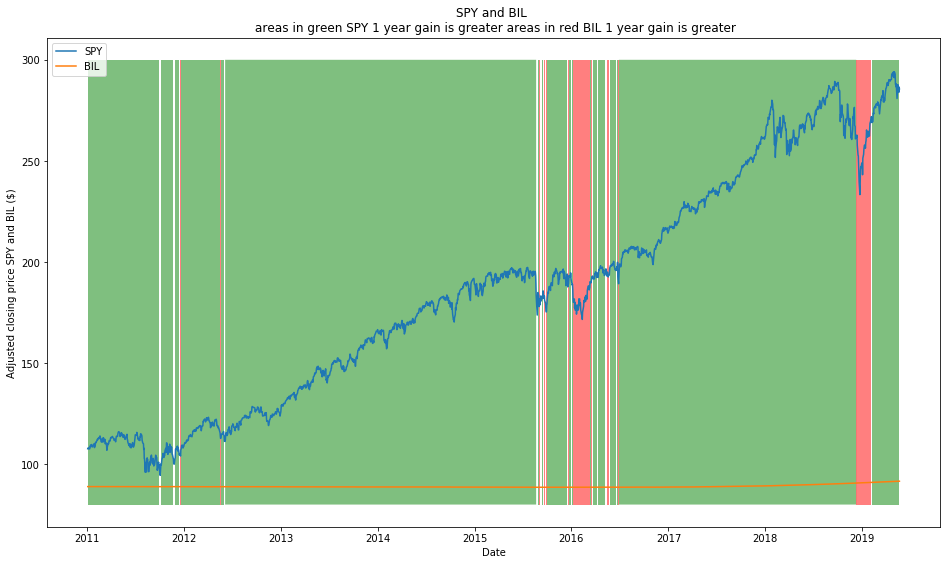

In [243]:
# Calculate 12 month gains
spy_12M_gain = spy_data.pct_change(252)
bil_12M_gain = bil_data.pct_change(252)

# Determine which has greater gain SPY or BIL
gain_flag_12M = spy_12M_gain - bil_12M_gain
gain_flag_12M = gain_flag_12M.dropna()
# gain is a series with 0 if SPY performed better or -1 if BIL performed better
gain_flag_12M = gain_flag_12M.apply(lambda x: 0 if x >= 0 else -1) 
# truncate SPY and BIL data to match the length of the gain series
spy_trunc_data = spy_data.truncate(before = '2011-01-03')
bil_trunc_data = bil_data.truncate(before = '2011-01-03')

# Plot SPY and BIL
fig, ax = plt.subplots(figsize=(16,9))
ax.set_title('SPY and BIL \n areas in green SPY 1 year gain is greater areas in red BIL 1 year gain is greater')

ax.plot(spy_trunc_data.index, spy_trunc_data, label='SPY')
ax.plot(bil_trunc_data.index, bil_trunc_data, label='BIL')
# Add labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price SPY and BIL ($)')
ax.legend()
# fillin green or red bars depending if SPY or BIL had a better 1 year gain
ax.fill_between(spy_trunc_data.index, 80, 300, where = gain_flag_12M==0, facecolor = 'green', alpha=0.5)
ax.fill_between(spy_trunc_data.index, 80, 300, where = gain_flag_12M<0, facecolor = 'red', alpha=0.5)

### Plot SPY and BIL with 5M gain bars
overlay green bars if SPY had a better 1 year gain and red bars if BIL had a better 1 year gain

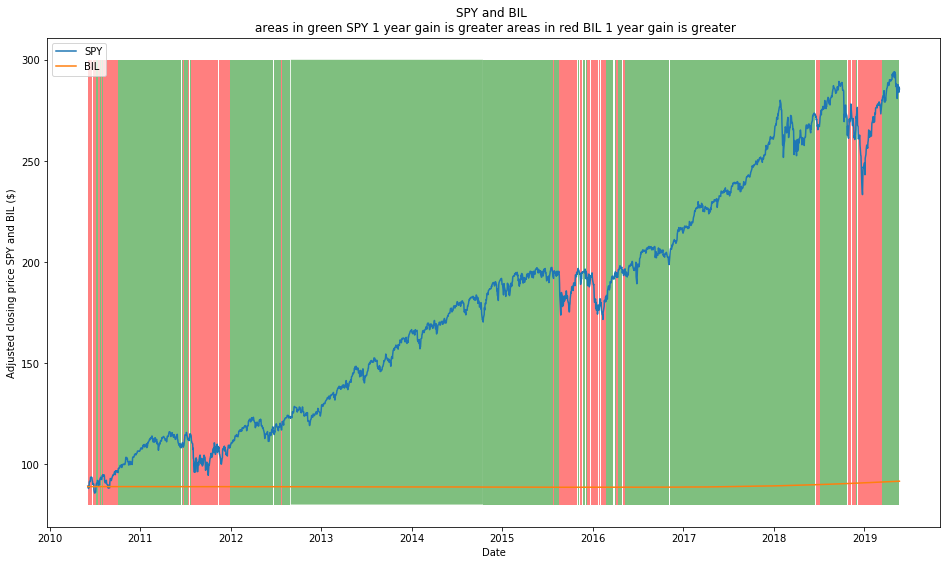

In [244]:
# Calculate 1 year gains
spy_5M_gain = spy_data.pct_change(105)
bil_5M_gain = bil_data.pct_change(105)

# Determine which has greater gain SPY or BIL
gain_flag_5M = spy_5M_gain - bil_5M_gain
gain_flag_5M = gain_flag_5M.dropna()
# gain is a series with 0 if SPY performed better or -1 if BIL performed better
gain_flag_5M = gain_flag_5M.apply(lambda x: 0 if x >= 0 else -1) 
# truncate SPY and BIL data to match the length of the gain series
spy_data = spy_data.truncate(before = '2010-06-04')
bil_data = bil_data.truncate(before = '2010-06-04')

# Plot SPY and BIL
fig, ax = plt.subplots(figsize=(16,9))
ax.set_title('SPY and BIL \n areas in green SPY 1 year gain is greater areas in red BIL 1 year gain is greater')

ax.plot(spy_data.index, spy_data, label='SPY')
ax.plot(bil_data.index, bil_data, label='BIL')
# Add labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price SPY and BIL ($)')
ax.legend()
# fillin green or red bars depending if SPY or BIL had a better 1 year gain
ax.fill_between(spy_data.index, 80, 300, where = gain_flag_5M==0, facecolor = 'green', alpha=0.5)
ax.fill_between(spy_data.index, 80, 300, where = gain_flag_5M<0, facecolor = 'red', alpha=0.5)


### Calculate the FundX Score for SPY and BIL
The FundX Score is the average of the 1, 3, 6 and 12 month gains

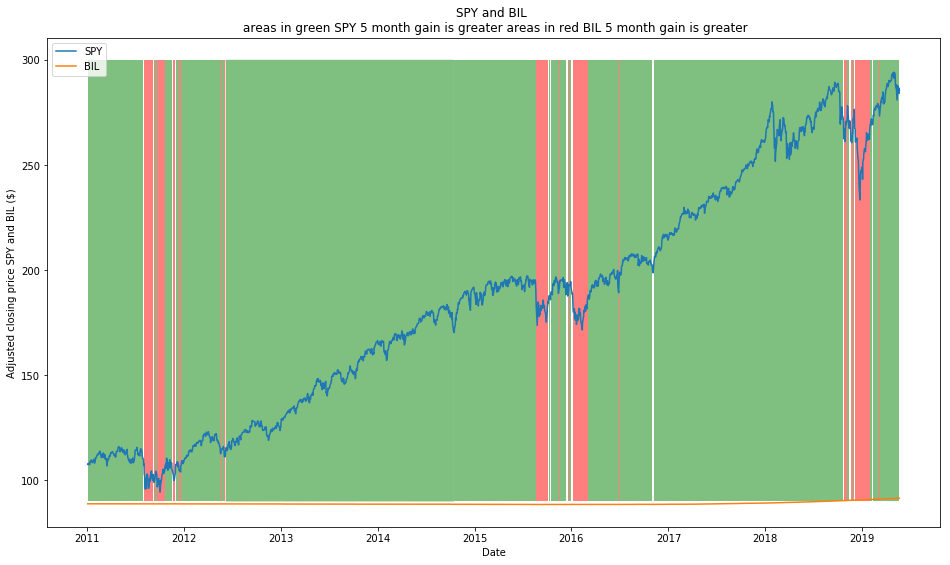

In [245]:
# Calculate 1, 3, 6 month gains
spy_1M_gain = spy_data.pct_change(21)
bil_1M_gain = bil_data.pct_change(21)
spy_3M_gain = spy_data.pct_change(3*21)
bil_3M_gain = bil_data.pct_change(3*21)
spy_6M_gain = spy_data.pct_change(6*21)
bil_6M_gain = bil_data.pct_change(6*21)

spy_fundX_score = (spy_1M_gain + spy_3M_gain + spy_6M_gain + spy_12M_gain)/4
bil_fundX_score = (bil_1M_gain + bil_3M_gain + bil_6M_gain + bil_12M_gain)/4

# Determine which has greater gain SPY or BIL
gain_flag_fundX = spy_fundX_score - bil_fundX_score
gain_flag_fundX = gain_flag_fundX.dropna()
# gain is a series with 0 if SPY performed better or -1 if BIL performed better
gain_flag_fundX = gain_flag_fundX.apply(lambda x: 0 if x >= 0 else -1) 

# truncate SPY and BIL data to match the length of the gain series
spy_trunc_data = spy_data.truncate(before = '2011-01-03')
bil_trunc_data = bil_data.truncate(before = '2011-01-03')

# Plot SPY and BIL
fig, ax = plt.subplots(figsize=(16,9))
ax.set_title('SPY and BIL \n areas in green SPY 5 month gain is greater areas in red BIL 5 month gain is greater')

ax.plot(spy_trunc_data.index, spy_trunc_data, label='SPY')
ax.plot(bil_trunc_data.index, bil_trunc_data, label='BIL')
# Add labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price SPY and BIL ($)')
ax.legend()
# fillin green or red bars depending if SPY or BIL had a better fundX score
ax.fill_between(spy_trunc_data.index, 90, 300, where = gain_flag_fundX==0, facecolor = 'green', alpha=0.5)
ax.fill_between(spy_trunc_data.index, 90, 300, where = gain_flag_fundX<0, facecolor = 'red', alpha=0.5)

## Determine 5M gain going 'Long' or 'Short' when moving averages cross

In [256]:
# If the 5 month SPY gain greater than BIL go LONG
# otherwise go Short
current_gain_flag_5M = gain_flag_5M.loc[todays_date]
current_spy_5M_gain = str(round((spy_5M_gain[todays_date])*100,2))
current_bil_5M_gain = str(round((bil_5M_gain[todays_date])*100,2))
print("today's 5M SPY gain =  " + current_spy_5M_gain + "%")
print("today's 5M BIL gain =  " + current_bil_5M_gain + "%")
if (current_gain_flag_5M == 0):
    status_5M = 'LONG'
else:
    status_5M = 'SHORT'
print(status_5M)   

today's 5M SPY gain =  14.84%
today's 5M BIL gain =  0.98%
LONG


## Determine 12M gain going 'Long' or 'Short' when moving averages cross

In [263]:
# If the 12 month SPY gain greater than BIL go LONG
# otherwise go Short
current_gain_flag_12M = gain_flag_12M.loc[todays_date]
current_spy_12M_gain = str(round((spy_12M_gain[todays_date])*100,2))
current_bil_12M_gain = str(round((bil_12M_gain[todays_date])*100,2))
print("today's 12M SPY gain =  " + current_spy_12M_gain + "%")
print("today's 12M BIL gain =  " + current_bil_12M_gain + "%")
if (current_gain_flag_5M == 0):
    status_12M = 'LONG'
else:
    status_12M = 'SHORT'
print(status_12M)   

today's 12M SPY gain =  6.51%
today's 12M BIL gain =  2.07%
LONG


## Determine FundX Score going 'Long' or 'Short' when moving averages cross

In [268]:
# If the FundX score of the SPY is greater than BIL go LONG
# otherwise go Short
current_fundX_score_flag = gain_flag_fundX.loc[todays_date]
current_spy_fundX_score = str(round((spy_fundX_score[todays_date])*100,2))
current_bil_fundX_score = str(round((bil_fundX_score[todays_date])*100,2))
print("today's SPY FundX Score =  " + current_spy_fundX_score + "%")
print("today's BIL FundX Score =  " + current_bil_fundX_score + "%")
if (current_fundX_score_flag == 0):
    status_fundX = 'LONG'
else:
    status_fundX = 'SHORT'
print(status_fundX) 
print(todays_date)
type(todays_date)


today's SPY FundX Score =  3.21%
today's BIL FundX Score =  1.0%
LONG
2019-5-22


str

### Create DataFrame with result

In [269]:
indicators = pd.DataFrame([{'Technical Indicator': '5 Month gain', 'Type': 'Market Timer',
                            todays_date: status_5M + "(" + current_spy_5M_gain + "/" + current_bil_5M_gain + ")",
                             'Comment': " SPY 5M Gain > BIL 5M Gain"},
                          {'Technical Indicator': '12 Month gain', 'Type': 'Market Timer',
                           todays_date: status_12M + "(" + current_spy_12M_gain + "/" + current_bil_12M_gain + ")",
                           'Comment': " SPY 12M Gain > BIL 12M Gain"},
                          {'Technical Indicator': 'FundX Score', 'Type': 'Market Timer',
                           todays_date: status_fundX + "(" + current_spy_fundX_score + "/" + current_bil_fundX_score + ")",
                           'Comment': " SPY FundX Score > BIL FundX Score"}], 
                           columns=['Technical Indicator', 'Type', todays_date, 'Comment'])
indicators

,Technical Indicator,Type,2019-5-22,Comment
0,5 Month gain,Market Timer,LONG(14.84/0.98),SPY 5M Gain > BIL 5M Gain
1,12 Month gain,Market Timer,LONG(6.51/2.07),SPY 12M Gain > BIL 12M Gain
2,FundX Score,Market Timer,LONG(3.21/1.0),SPY FundX Score > BIL FundX Score


### Output to Excel file

In [266]:
writer = pd.ExcelWriter('indicator_sheet Momentum gain.xlsx')
indicators.to_excel(writer,'Indicators', index=False)
writer.save()